# Trial Exploratory Data Analysis

## Breaking down the task

1. Vizualize all variables
2. What variable can select `log_day_sequence < 2`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/data_sample.csv')

In [3]:
df.head()

,Unnamed: 0,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence
0,0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1
1,1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1
2,2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1
3,3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1
4,4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1


## `episode_type`

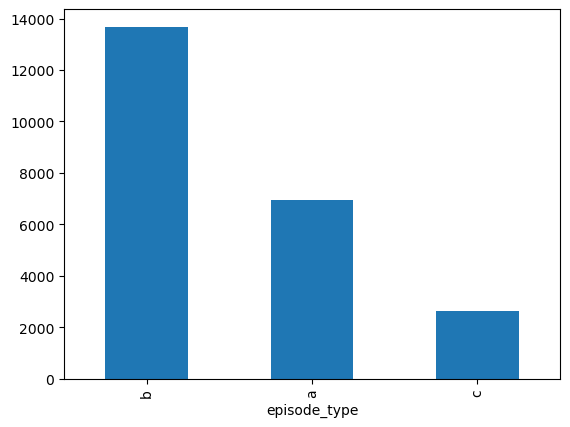

In [4]:
episode_types = df['episode_type'].value_counts()
episode_types.plot(kind = 'bar')
plt.show()

## `episode_id`


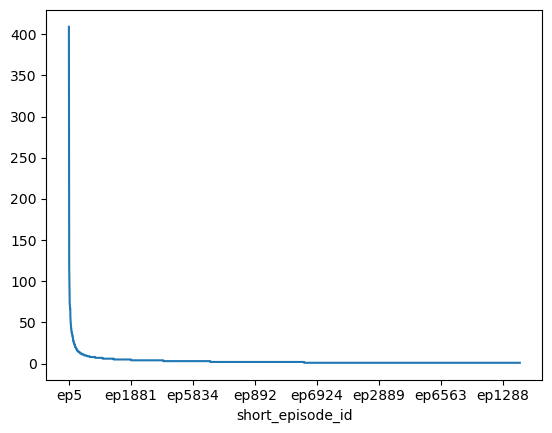

In [5]:
df['short_episode_id'] = df['episode_id'].str.replace(r'^ep0+', 'ep', regex = True)

short_episode_count = df['short_episode_id'].value_counts()
#plt.figure(figsize=(10,6), dpi=400)
short_episode_count.plot(kind = 'line')

#plt.xticks(ticks=range(len(df['short_episode_id'])), rotation=45)

plt.show()

## `show_id`

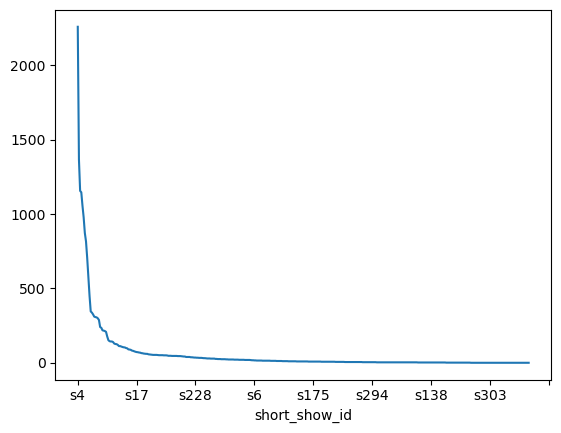

In [6]:
df['short_show_id'] = df['show_id'].str.replace(r'^s0+', 's', regex=True)

show_id_count = df['short_show_id'].value_counts()
show_id_count.plot(kind='line')

plt.show()

## `user_id`

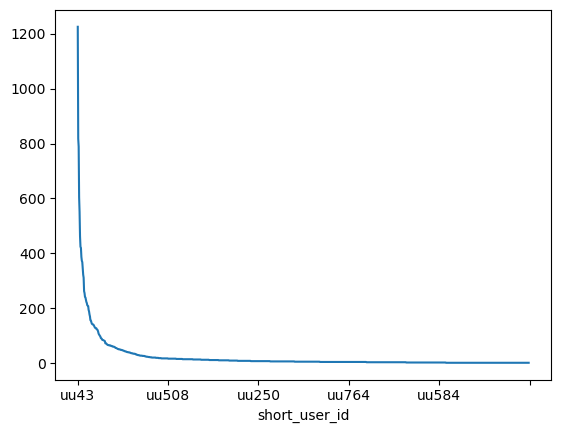

In [7]:
df['short_user_id'] = df['user_id'].str.replace(r'^uu0+', 'uu', regex=True)

user_id_count = df['short_user_id'].value_counts()
user_id_count.plot(kind='line')

plt.show()

## `log_date`

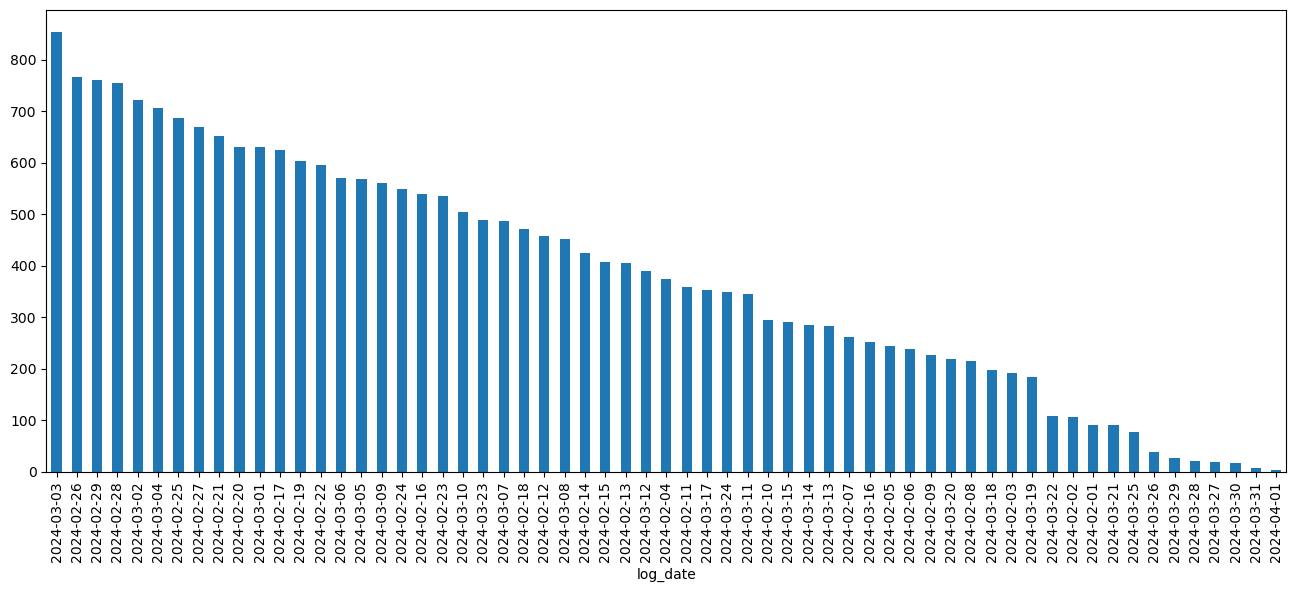

In [8]:
log_date_count = df['log_date'].value_counts()

plt.figure(figsize = (16, 6))
log_date_count.plot(kind='bar')

plt.show()

## `view_start_time`

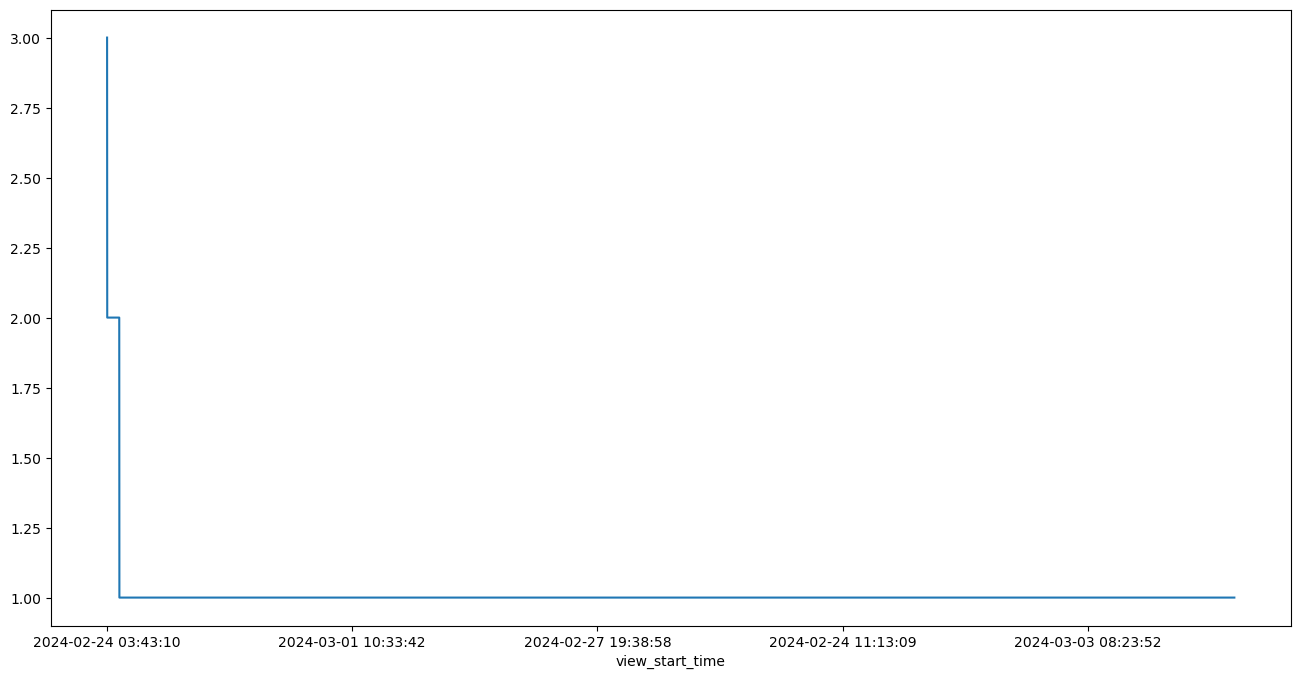

In [9]:
view_start_time_count = df['view_start_time'].value_counts()

plt.figure(figsize=(16,8))
view_start_time_count.plot(kind='line')
plt.show()

## `view_end_time`

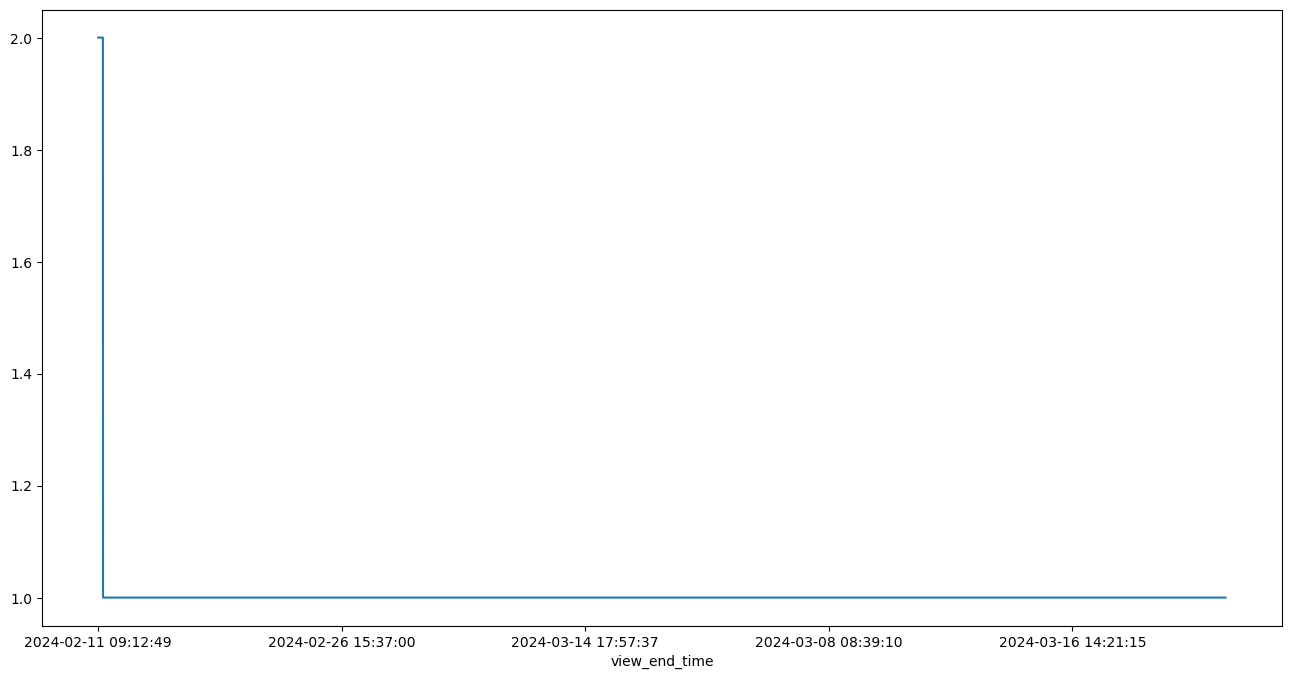

In [10]:
view_end_time_count = df['view_end_time'].value_counts()

plt.figure(figsize=(16,8))
view_end_time_count.plot(kind='line')
plt.show()

In [11]:
df['view_start_time'] = pd.to_datetime(df['view_start_time'])
df['view_end_time'] = pd.to_datetime(df['view_end_time'])
df['view_duration'] = df['view_end_time'] - df['view_start_time']

In [12]:
df['view_duration']

0       0 days 00:00:14
1       0 days 00:01:06
2       0 days 00:01:03
3       0 days 00:01:21
4       0 days 00:00:29
              ...      
23237   0 days 00:03:27
23238   0 days 00:03:20
23239   0 days 00:02:57
23240   0 days 00:02:09
23241   0 days 00:02:51
Name: view_duration, Length: 23242, dtype: timedelta64[ns]

## `view_duration`

<Axes: xlabel='view_duration'>

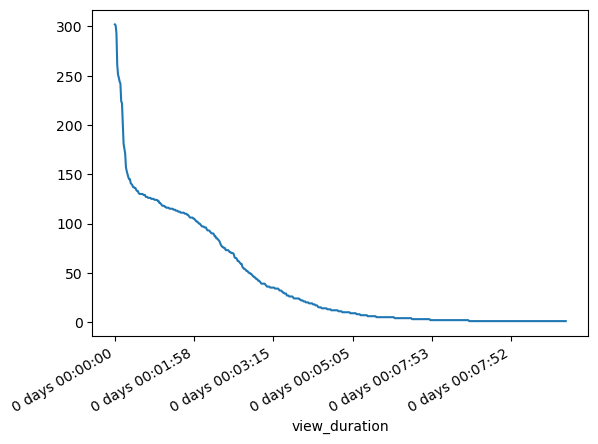

In [13]:
view_duration_count = df['view_duration'].value_counts()

view_duration_count.plot(kind='line')

## `view_percent`

<Axes: ylabel='Frequency'>

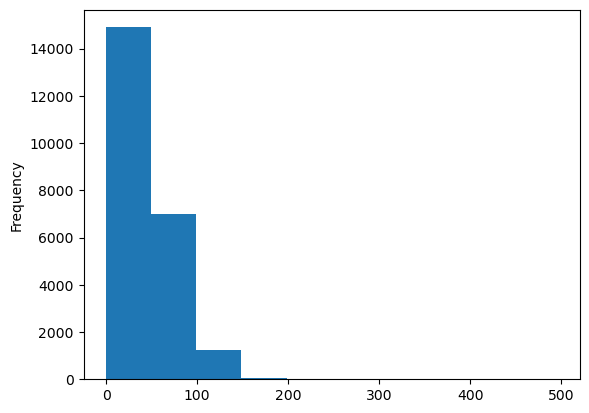

In [14]:
df['view_percent'].plot(kind='hist', bins = 10)

## `log_day_sequence`

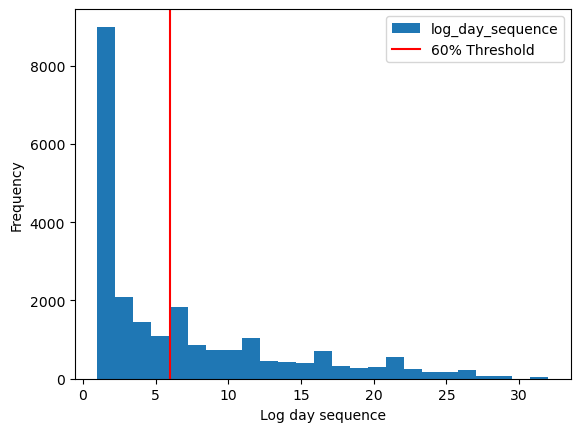

In [38]:
df['log_day_sequence'].plot(kind='hist', bins = 25)

threshold = np.percentile(df['log_day_sequence'], 60)

plt.axvline(threshold, color = 'red', linestyle = '-', label='60% Threshold')
plt.xlabel('Log day sequence')
plt.legend()

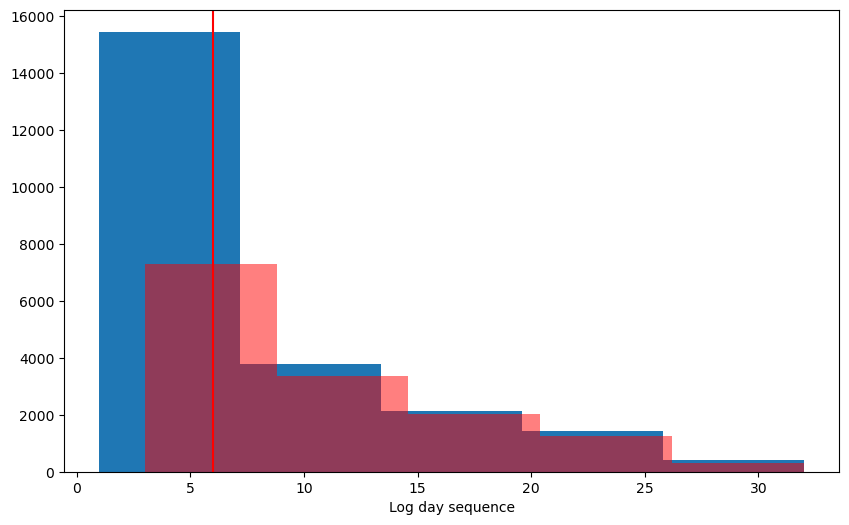

In [52]:
plt.figure(figsize=(10,6))

plt.axvline(threshold, color = 'red', linestyle = '-', label='60% Threshold')
plt.hist(df['log_day_sequence'], bins = 5)
plt.hist(df.loc[df['log_day_sequence'] > 2, 'log_day_sequence'], bins = 5, color='red', alpha=0.5)
plt.xlabel('Log day sequence')

plt.show()

## After Checking all variables

* How to find the content that is most popular?
* Is it relevant to know what users, `user_id` have the most `view_duration` ?
* How to get a Japanese Calendar for 2024 containing weekdays, holidays and weekends ?

### What `episode_type`, `show_id` and `episode_id` has the most `view_duration`, `log_day_sequence`?

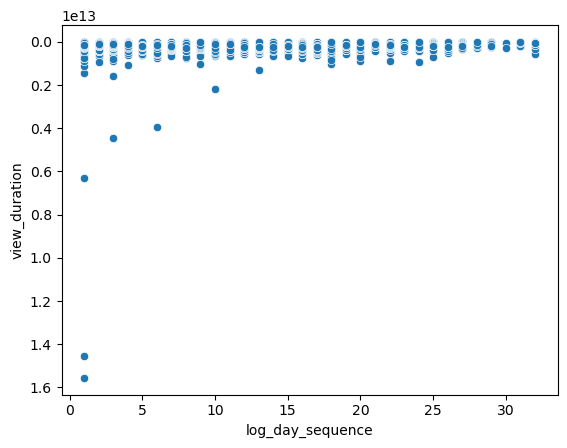

In [16]:
sns.scatterplot(x='log_day_sequence', y='view_duration', data=df)
plt.show()

In [17]:
df.episode_id == "ep00000282"

0        False
1        False
2        False
3        False
4        False
         ...  
23237    False
23238    False
23239    False
23240    False
23241    False
Name: episode_id, Length: 23242, dtype: bool

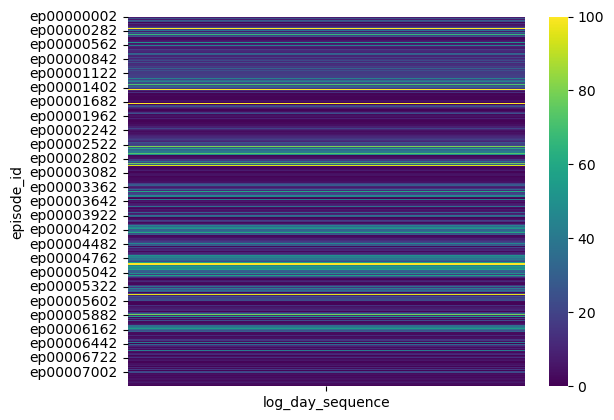

In [18]:
# trying a heatmap again
heatmap_data = df.pivot_table(values='log_day_sequence', index='episode_id', aggfunc='sum')
#heatmap_data = df[df['episode_id' == 'ep00000282']].pivot_table(values='log_day_sequence', index='episode_id', aggfunc='sum')

sns.heatmap(heatmap_data, annot=False, vmin = 0, vmax = 100, cmap='viridis')
plt.show()

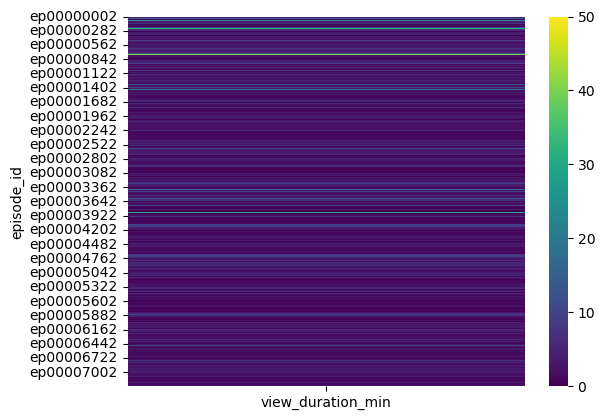

In [19]:
# trying a heatmap again

def view_duration_to_min(view_duration):
    return int(view_duration.total_seconds() / 60)

df['view_duration_min'] = df['view_duration'].apply(view_duration_to_min)
#df['view_duration_min'].max()

heatmap_data = df.pivot_table(values='view_duration_min', index='episode_id', aggfunc='sum')

sns.heatmap(heatmap_data, annot=False, vmin = 0, vmax = 50, cmap='viridis')
plt.show()

In [20]:
# Summarize the distribution of 'log_day_sequence'
log_day_sequence_distribution = df['log_day_sequence'].value_counts().sort_index()

log_day_sequence_distribution


log_day_sequence
1     5989
2     3007
3     2079
4     1441
5     1086
6      988
7      851
8      851
9      725
10     728
11     539
12     505
13     448
14     431
15     406
16     325
17     380
18     337
19     269
20     310
21     308
22     242
23     253
24     161
25     162
26     118
27     116
28      81
29      65
30       2
31      21
32      18
Name: count, dtype: int64

In [21]:
# Segmentation: Split data into one-time users and multi-login users based on 'log_day_sequence'
one_time_users = df[df['log_day_sequence'] == 1]
multi_login_users = df[df['log_day_sequence'] > 1]

# Compare viewing behavior: average view percentage and number of sessions per user for both groups
one_time_viewing = one_time_users.groupby('user_id').agg(
    avg_view_percent=('view_percent', 'mean'),
    total_sessions=('log_day_sequence', 'size')
).mean()

multi_login_viewing = multi_login_users.groupby('user_id').agg(
    avg_view_percent=('view_percent', 'mean'),
    total_sessions=('log_day_sequence', 'size')
).mean()

one_time_viewing, multi_login_viewing


(avg_view_percent    26.058085
 total_sessions       5.987988
 dtype: float64,
 avg_view_percent    31.614251
 total_sessions      44.581395
 dtype: float64)

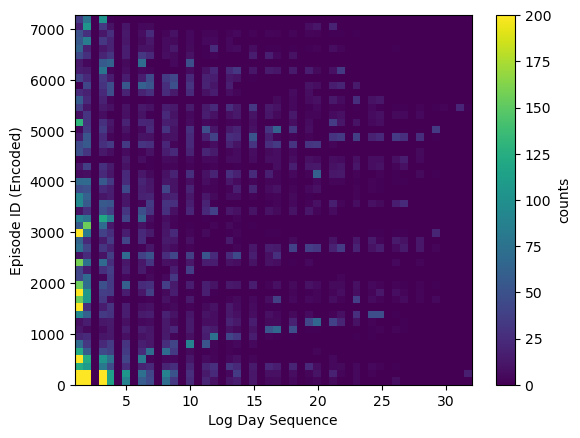

In [22]:
# Encode episode_id strings to intergers
le = LabelEncoder()
episode_ids_encoded = le.fit_transform(df['episode_id'])

# Convert log_day_sequence to numpy array if it's not already
log_day_sequence = df['log_day_sequence'].to_numpy()

# Create 2d histogram
plt.hist2d(log_day_sequence, episode_ids_encoded, bins=[50, 50], vmin = 0, vmax = 200, cmap='viridis')

# Add labels and color bar
plt.xlabel('Log Day Sequence')
plt.ylabel('Episode ID (Encoded)')
plt.colorbar(label='counts')

# show plot
plt.show()

In [25]:
# Encode episode_id strings to intergers
#le = LabelEncoder()
#episode_ids_encoded = le.fit_transform(df['episode_id'])

# Convert log_day_sequence to numpy array if it's not already
#log_day_sequence = df[df['log_day_sequence'] == 1].to_numpy()

# Create 2d histogram
#hist, xedges, yedges, image = plt.hist2d(log_day_sequence, episode_ids_encoded, bins=[50, 50], vmin = 0, vmax = 200, cmap='viridis')

#log_day_1_projection = hist[1, :]

#plt.bar(yedges[:-1], log_day_1_projection, width=np.diff(yedges))

# Add labels and color bar
#plt.xlabel('Log Day Sequence')
#plt.ylabel('Episode ID (Encoded)')
#plt.colorbar(label='counts')

# show plot
#plt.show()

In [26]:
episode_ids_encoded

array([   0,    0,    0, ..., 7268, 7269, 7270])

In [27]:
logDay1 = df[df['log_day_sequence'] == 1]

## `log_day_sequence == 1` `view_percent` histogram

<Axes: ylabel='Frequency'>

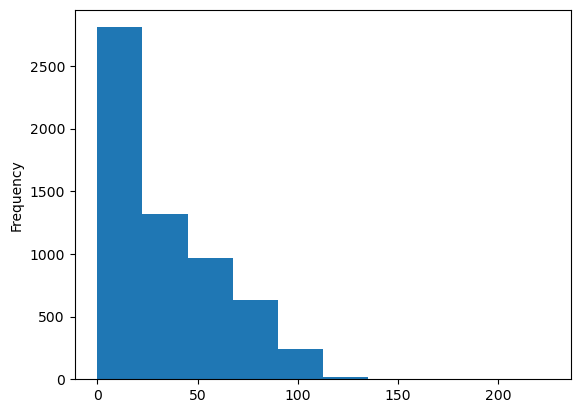

In [32]:
logDay1['view_percent'].plot(kind='hist')

UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

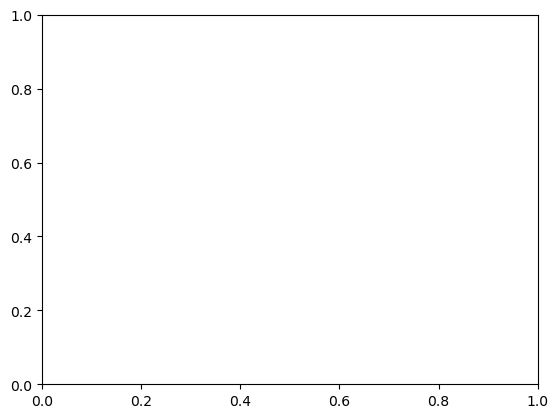

In [33]:
logDay1[''].plot(kind='hist')